<a href="https://colab.research.google.com/github/miller00315/estatistica_machine_learning/blob/master/dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import random
import seaborn as sns # visualização de graficos
from sklearn.model_selection import  train_test_split
from sklearn.naive_bayes import  GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

Dados desbalanceados

Carregamento de dados

In [5]:
dataset = pd.read_csv('credit_data.csv')

In [ ]:
dataset.shape

(2000, 5)

In [ ]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
dataset.dropna(inplace=True) #remove variáveis nulas ou incompletas, inplace true indica que não precisa ser criada uma nova

In [ ]:
dataset.shape

(1997, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


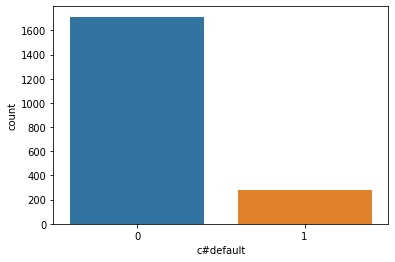

In [7]:
sns.countplot(dataset['c#default']); # mostra um grafico com a separação de acordo com o parametro estabelecido

Treinamento e teste

In [29]:
x = dataset.iloc[:, 1:4].values #  pega todos os registros da coluna 1 ignorando a 4, ou seja até a 3 coluna

In [ ]:
x.shape

(1997, 3)

In [ ]:
x # previsores


array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [31]:
y = dataset.iloc[:, 4] # coleta apenas os dados da coluna 4, contendo as respostas

In [30]:
y.shape

(1997,)

Separar em treinamento e teste

In [ ]:
x_trainning, x_test, y_training_, y_test = train_test_split(x, y, test_size = 0.2, stratify = y) # insiro os dados a serem avaliados, os resultados, a porcentagem de treino e qual a referencia para estartificar os dados

In [ ]:
x_trainning.shape, y_training_.shape

((1597, 3), (1597,))

In [ ]:
x_test.shape, y_test.shape

((400, 3), (400,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_training_, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([343,  57]))

In [ ]:
model = GaussianNB() # importo o modelo

model.fit(x_trainning, y_training_)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsions = model.predict(x_test)

In [ ]:
accuracy_score(previsions, y_test)

0.93

In [ ]:
cm = confusion_matrix(previsions, y_test)
cm

array([[339,  24],
       [  4,  33]])

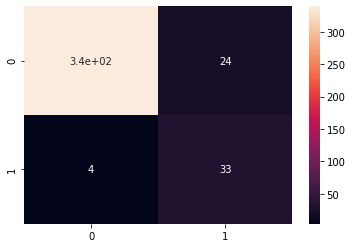

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
339 / (339 + 24) # pagantes

0.9338842975206612

In [ ]:
33 / (33 + 4) # calotão

0.8918918918918919

Subamostragem (undersampling) -Tomek link

In [2]:
tl = TomekLinks(return_indices=True, ratio='majority') # retorna os indices e remove items da classe majoritária

In [10]:
x_under, y_under, id_under = tl.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
x_under.shape, y_under.shape, id_under

((1897, 3), (1897,), array([   0,    1,    2, ..., 1994, 1995, 1996]))

In [12]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [13]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [14]:
x_training_under, x_test_under, y_training_under, y_test_under = train_test_split(x_under, y_under, test_size = 0.2, stratify = y_under)

In [15]:
x_training_under.shape, y_training_under.shape # dados para treinamento

((1517, 3), (1517,))

In [16]:
x_test_under.shape, y_test_under.shape # dados para teste, o y_test_under são as respostas reais

((380, 3), (380,))

In [18]:
model_under = GaussianNB() #cria o modelo
model_under.fit(x_training_under, y_training_under) # realiza o treinamento do model na base de teste
previsions_under = model_under.predict(x_test_under) # realiza a previsões de acordo com a base de dados
accuracy_score(previsions_under, y_test_under) # verifica a acurácia do modelo

0.9315789473684211

In [21]:
cm_under = confusion_matrix(previsions_under, y_test_under) # mostra a matriz de confusão
cm_under

array([[314,  17],
       [  9,  40]])

In [22]:
40 / (40 + 9) # não pagam

0.8163265306122449

In [23]:
314 / (314 + 17) # pagam 

0.9486404833836858

Sobreamostragem (oversampling) - SMOTE

In [27]:
smote = SMOTE(ratio='minority') # utiliza a classe minoritária para balancea-la de acordo com a classe majoritária

In [33]:
x_over, y_over = smote.fit_sample(x, y) # reliza o ajuste das bases

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
x_over.shape, y_over.shape

((3428, 3), (3428,))

In [39]:
np.unique(y, return_counts = True), np.unique(y_over, return_counts = True)

((array([0, 1]), array([1714,  283])), (array([0, 1]), array([1714, 1714])))

In [35]:
x_training_over, x_test_over, y_training_over, y_test_over = train_test_split(x_over, y_over, test_size = 0.2, stratify = y_over)

In [40]:
x_training_over.shape, x_test_over.shape

((2742, 3), (686, 3))

In [36]:
model_over = GaussianNB() #cria o modelo
model_over.fit(x_training_over, y_training_over) # realiza o treinamento do model na base de teste e gera a tabela de probabilidade
previsions_over = model_over.predict(x_test_over) # realiza a previsões de acordo com a base de dados
accuracy_score(previsions_over, y_test_over)

0.934402332361516

In [41]:
cm_over = confusion_matrix(previsions_over, y_test_over)
cm_over

array([[305,   7],
       [ 38, 336]])

In [45]:
305 / (305 + 7) # pagam

0.9775641025641025

In [46]:
336 / (38 + 336) # não pagam

0.8983957219251337

In [47]:
1000 * 9 / 100

90.0

In [48]:
90 * 5000

450000

Exercício de fixação

In [56]:
ebay_dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')

In [57]:
ebay_dataset.shape

(5806, 75)

In [58]:
ebay_dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,sconscientiousness,magreeableness,cagreeableness,sagreeableness,mopenness,copenness,sopenness,agreeablenessIndico,conscientiousnessIndico,extraversionIndico,opennessIndico,openessWatson,conscientiousnessWatson,extraversionWatson,agreeablenessWatson,neuroticismWatson,o_adventure,o_artistic,o_emotionality,o_imagination,o_intelect,o_liberalism,c_achievement,c_cautiouness,c_dutifulness,c_orderliness,c_discipline,c_efficacy,e_activity,e_assertiveness,e_cheerfulness,e_excitement,e_friend,e_gregariouness,a_altruism,a_cooperation,a_modesty,a_morality,a_simpathy,a_trust,n_anger,n_anxiety,n_depression,n_immoderation,n_selfconsciouness,n_vulnerability,need_chalenge,need_closeness,need_curiosity,need_excitement,need_harmony,need_ideal,need_liberty,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,0.5,0,4.110703,0.4,0,5.645506,0.6,1,0.684026,0.410566,0.646393,0.541885,0.835889,0.607272,0.589781,0.797063,0.449051,0.479940,0.753559,0.744320,0.758126,0.684179,0.526194,0.683279,0.559430,0.667665,0.522323,0.570964,0.746656,0.496348,0.649539,0.577345,0.553578,0.541931,0.350008,0.750762,0.626144,0.476133,0.701773,0.764204,0.512819,0.569980,0.611817,0.446330,0.468466,0.542865,0.442188,0.587795,0.833622,0.810144,0.462635,0.852183,0.628620,0.681354,0.820817,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,0.5,0,3.806675,0.4,0,6.190563,0.6,1,0.464647,0.431002,0.569719,0.588085,0.830316,0.572403,0.564882,0.722874,0.461567,0.478643,0.710639,0.701289,0.782399,0.716377,0.547235,0.657048,0.510715,0.654974,0.505224,0.543689,0.754035,0.463572,0.667516,0.547494,0.580140,0.514974,0.327534,0.724414,0.556060,0.424484,0.610452,0.757238,0.514746,0.595900,0.623953,0.500948,0.467786,0.569568,0.408936,0.596168,0.766870,0.790915,0.473358,0.800680,0.628022,0.667925,0.785016,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,0.5,0,4.307670,0.4,0,5.834547,0.8,1,0.574335,0.438136,0.594625,0.536566,0.849708,0.582639,0.577375,0.752931,0.451419,0.510756,0.737884,0.676704,0.785777,0.684304,0.577079,0.658175,0.517050,0.639082,0.509898,0.520291,0.725458,0.487635,0.578349,0.528123,0.555361,0.474853,0.326494,0.678454,0.619364,0.453175,0.678154,0.694500,0.525181,0.579213,0.619524,0.519524,0.479714,0.611395,0.482310,0.641673,0.755555,0.818792,0.506326,0.798245,0.617355,0.700126,0.735538,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,0.7,0,4.613918,0.5,1,4.348694,0.7,1,0.574341,0.514639,0.514115,0.495976,0.790834,0.674920,0.646031,0.763297,0.549710,0.489649,0.646631,0.608902,0.677307,0.614726,0.488001,0.712907,0.549355,0.664191,0.538321,0.596186,0.756297,0.585698,0.624495,0.582153,0.520175,0.525256,0.373468,0.661293,0.656178,0.414692,0.648699,0.612588,0.611793,0.545152,0.545936,0.449869,0.435871,0.523706,0.440116,0.675587,0.751850,0.813193,0.556613,0.775064,0.700630,0.701459,0.690972,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,0.5,1,4.743250,0.3,0,4.486198,0.7,1,0.627522,0.542976,0.485505,0.485903,0.786669,0.670957,0.540510,0.764619,0.529810,0.473329,0.663005,0.608885,0.695995,0.601024,0.477730,0.702990,0.554734,0.667045,0.529989,0.574750,0.733478,0.563220,0.540472,0.565630,0.504446,0.493837,0.343277,0.644033,0.713643,0.449867,0.670262,0.618680,0.596047,0.516514,0.583900,0.494273,0.412867,0.575115,0.481213,0.621911,0.779859,0.786455,0.486580,0.808006,0.641099,0.686376,0.724988,0.718530,0.616852,0.692761,0.646695,0.677245,0.699

In [59]:
ebay_dataset['blacklist'] = ebay_dataset['blacklist'] == 'S' # converte a tabela black list para true ou false 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


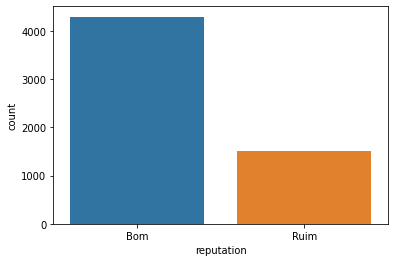

In [61]:
sns.countplot(ebay_dataset['reputation']);

In [62]:
len(ebay_dataset.columns)

75

In [63]:
x = ebay_dataset.iloc[:, 0:74] # previsores

In [64]:
x.shape

(5806, 74)

In [65]:
y = ebay_dataset.iloc[:, 74]

In [66]:
y.shape

(5806,)

In [67]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [69]:
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [70]:
x_training.shape, y_training.shape

((4644, 74), (4644,))

In [ ]:
x_test

In [72]:
ebay_model = RandomForestClassifier()
ebay_model.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
previsions = ebay_model.predict(x_test)
accuracy_score(previsions, y_test)

0.7444061962134251

Sub amostragem

In [74]:
tl_ebay = TomekLinks(return_indices=True, ratio='majority')

In [76]:
x_under, y_under, id_under = tl.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [77]:
x_under.shape, y_under.shape, id_under

((5417, 74), (5417,), array([   0,    1,    2, ..., 5803, 5804, 5805]))

In [78]:
x_training_under, x_test_under, y_training_under, y_test_under = train_test_split(x_under, y_under, test_size=0.2, stratify=y_under) 

In [79]:
model_ebay_under = RandomForestClassifier()
model_ebay_under.fit(x_training_under, y_training_under)
previsions_under = model_ebay_under.predict(x_test_under)

accuracy_score(previsions_under, y_test_under)

0.7306273062730627

In [80]:
smote = SMOTE(ratio='minority') 

In [81]:
x_over, y_over = smote.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [82]:
x_over.shape, y_over.shape

((8598, 74), (8598,))

In [85]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [83]:
x_training_over, x_test_over, y_training_over, y_test_over = train_test_split(x_over, y_over, test_size=0.2, stratify=y_over) 

In [84]:
model_ebay_over = RandomForestClassifier()
model_ebay_over.fit(x_training_over, y_training_over)
previsions_over = model_ebay_over.predict(x_test_over)

accuracy_score(previsions_over, y_test_over)

0.8075581395348838